<a href="https://colab.research.google.com/github/Saria-Alashry/Alashry/blob/%D8%A7%D9%84%D9%83%D9%88%D8%B1%D8%B3-%D8%A7%D9%84%D9%85%D9%81%D8%B5%D9%84-%D9%81%D9%8A-%D8%A7%D9%84%D8%B0%D9%83%D8%A7%D8%A1-%D8%A7%D9%84%D8%A7%D8%B5%D8%B7%D9%86%D8%A7%D8%B9%D9%8A-%D9%88%D9%85%D8%B3%D8%A7%D8%A8%D9%82%D8%A9-%D8%A8%D8%B1%D9%85%D8%AC%D8%A9-50-%D8%A7%D9%84%D9%81-%D8%AC%D9%86%D9%8A%D9%87/Linear_and_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examples from Lecture 3

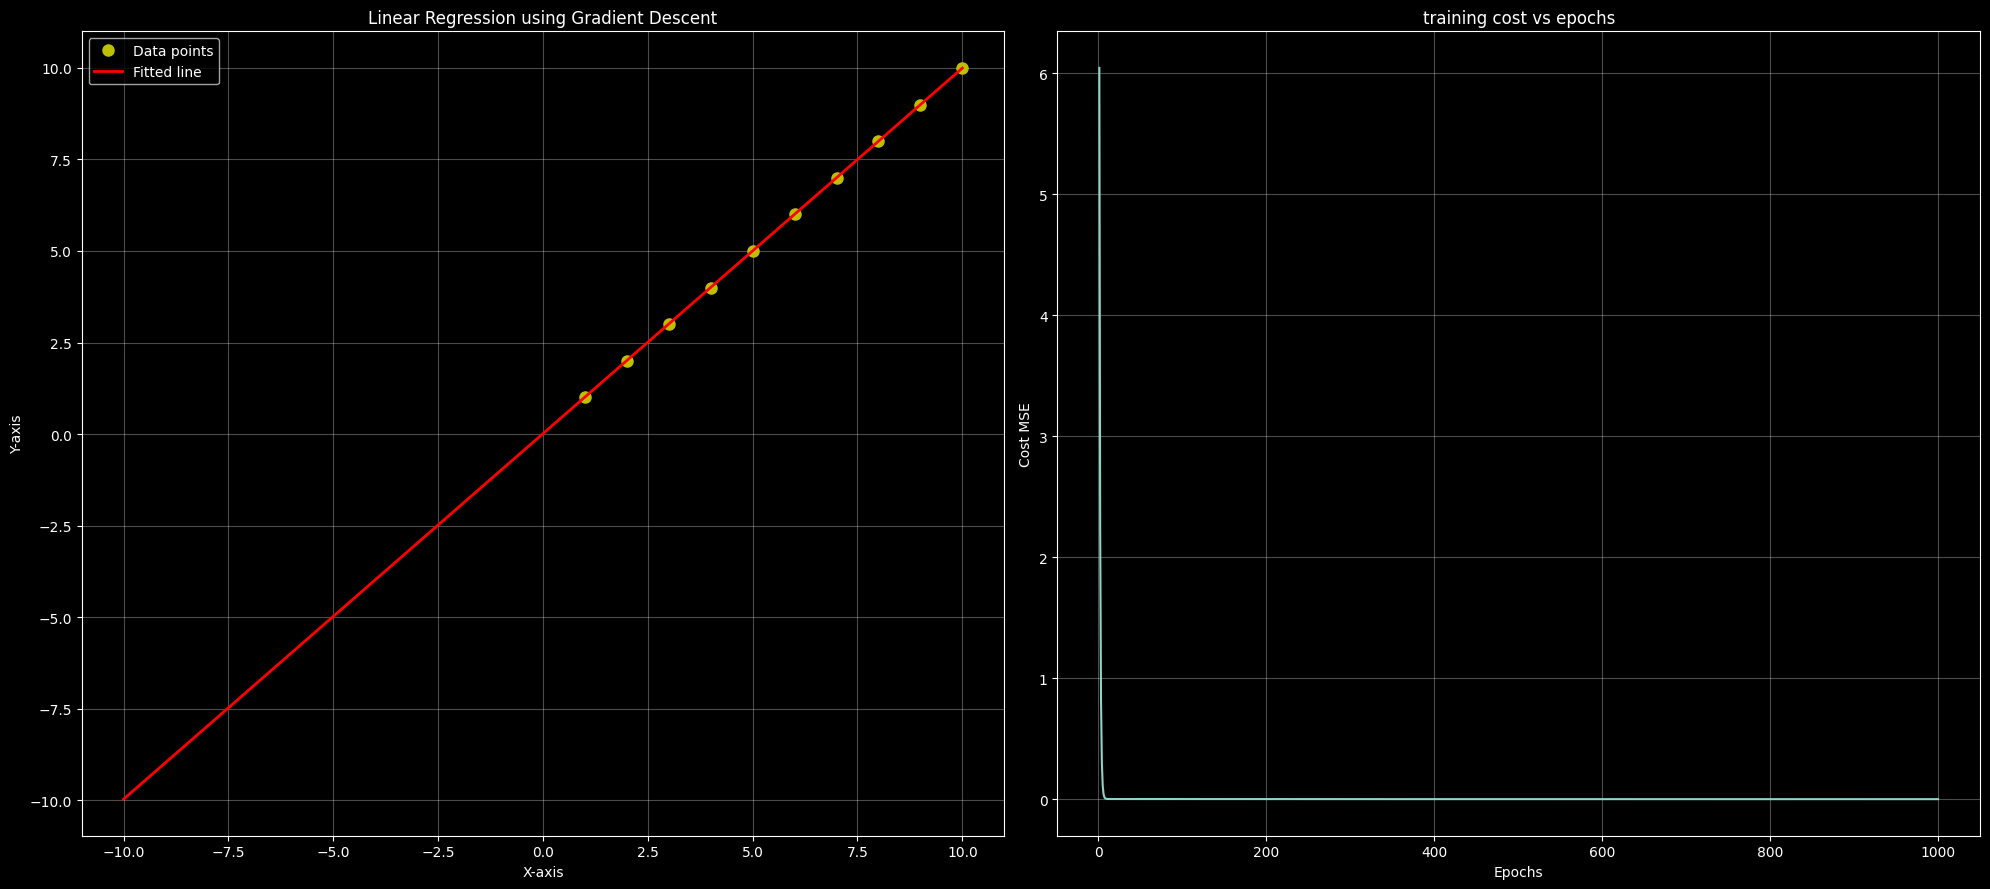

Final w:  0.9982
Final b:  0.0128
Final cost:  0.0000
Training stopped at epoch: 1000


In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')

x = np.arange(1, 11)
y = np.arange(1, 11)

plt.figure(figsize=(20, 9), dpi=100)
plt.subplot(1, 2, 1),
plt.plot(x, y, 'oy', markersize=8, label='Data points')

np.random.seed(2)
w = np.random.rand(1)[0]
b = np.random.rand(1)[0]



eta = 0.01
epochs = 1000
costVal = np.zeros(epochs)

for i in range(epochs):
    yhat = (w * x) + b
    w = w - eta * (yhat - y) @ x / len(x)
    b = b - eta * (np.mean(yhat - y))

    costVal[i] = 0.5 * (np.mean((yhat-y)**2))
    if costVal[i] < 1e-5:
        break

xvals = np.arange(-10, 11)
yvals = (w * xvals) + b
plt.plot(xvals, yvals, 'r-', linewidth=2, label='Fitted line')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Linear Regression using Gradient Descent')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(1, i+2), costVal[:i+1])
plt.xlabel('Epochs')
plt.ylabel('Cost MSE')
plt.title('training cost vs epochs')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f'Final w: {w: 0.4f}')
print(f'Final b: {b: 0.4f}')
print(f'Final cost: {costVal[i]: 0.4f}')
print(f'Training stopped at epoch: {i+1}')

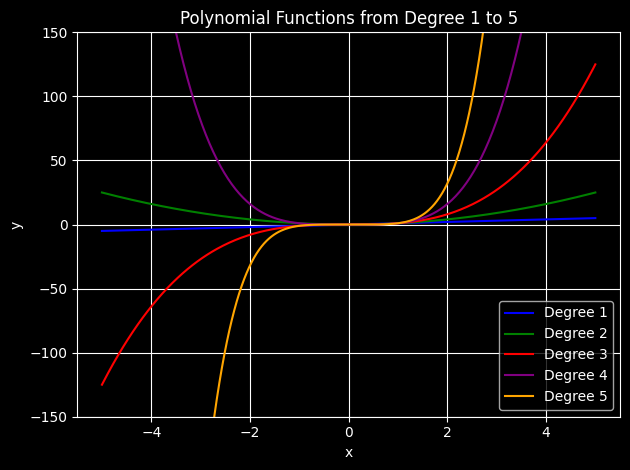

In [2]:
x = np.linspace(-5, 5, 400)
colors = ['blue', 'green', 'red', 'purple', 'orange']

for n, color in zip(range(1, 6), colors):
    y = x ** n
    plt.plot(x, y, label=f'Degree {n}', color=color)

plt.ylim(-150, 150)
plt.title('Polynomial Functions from Degree 1 to 5')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

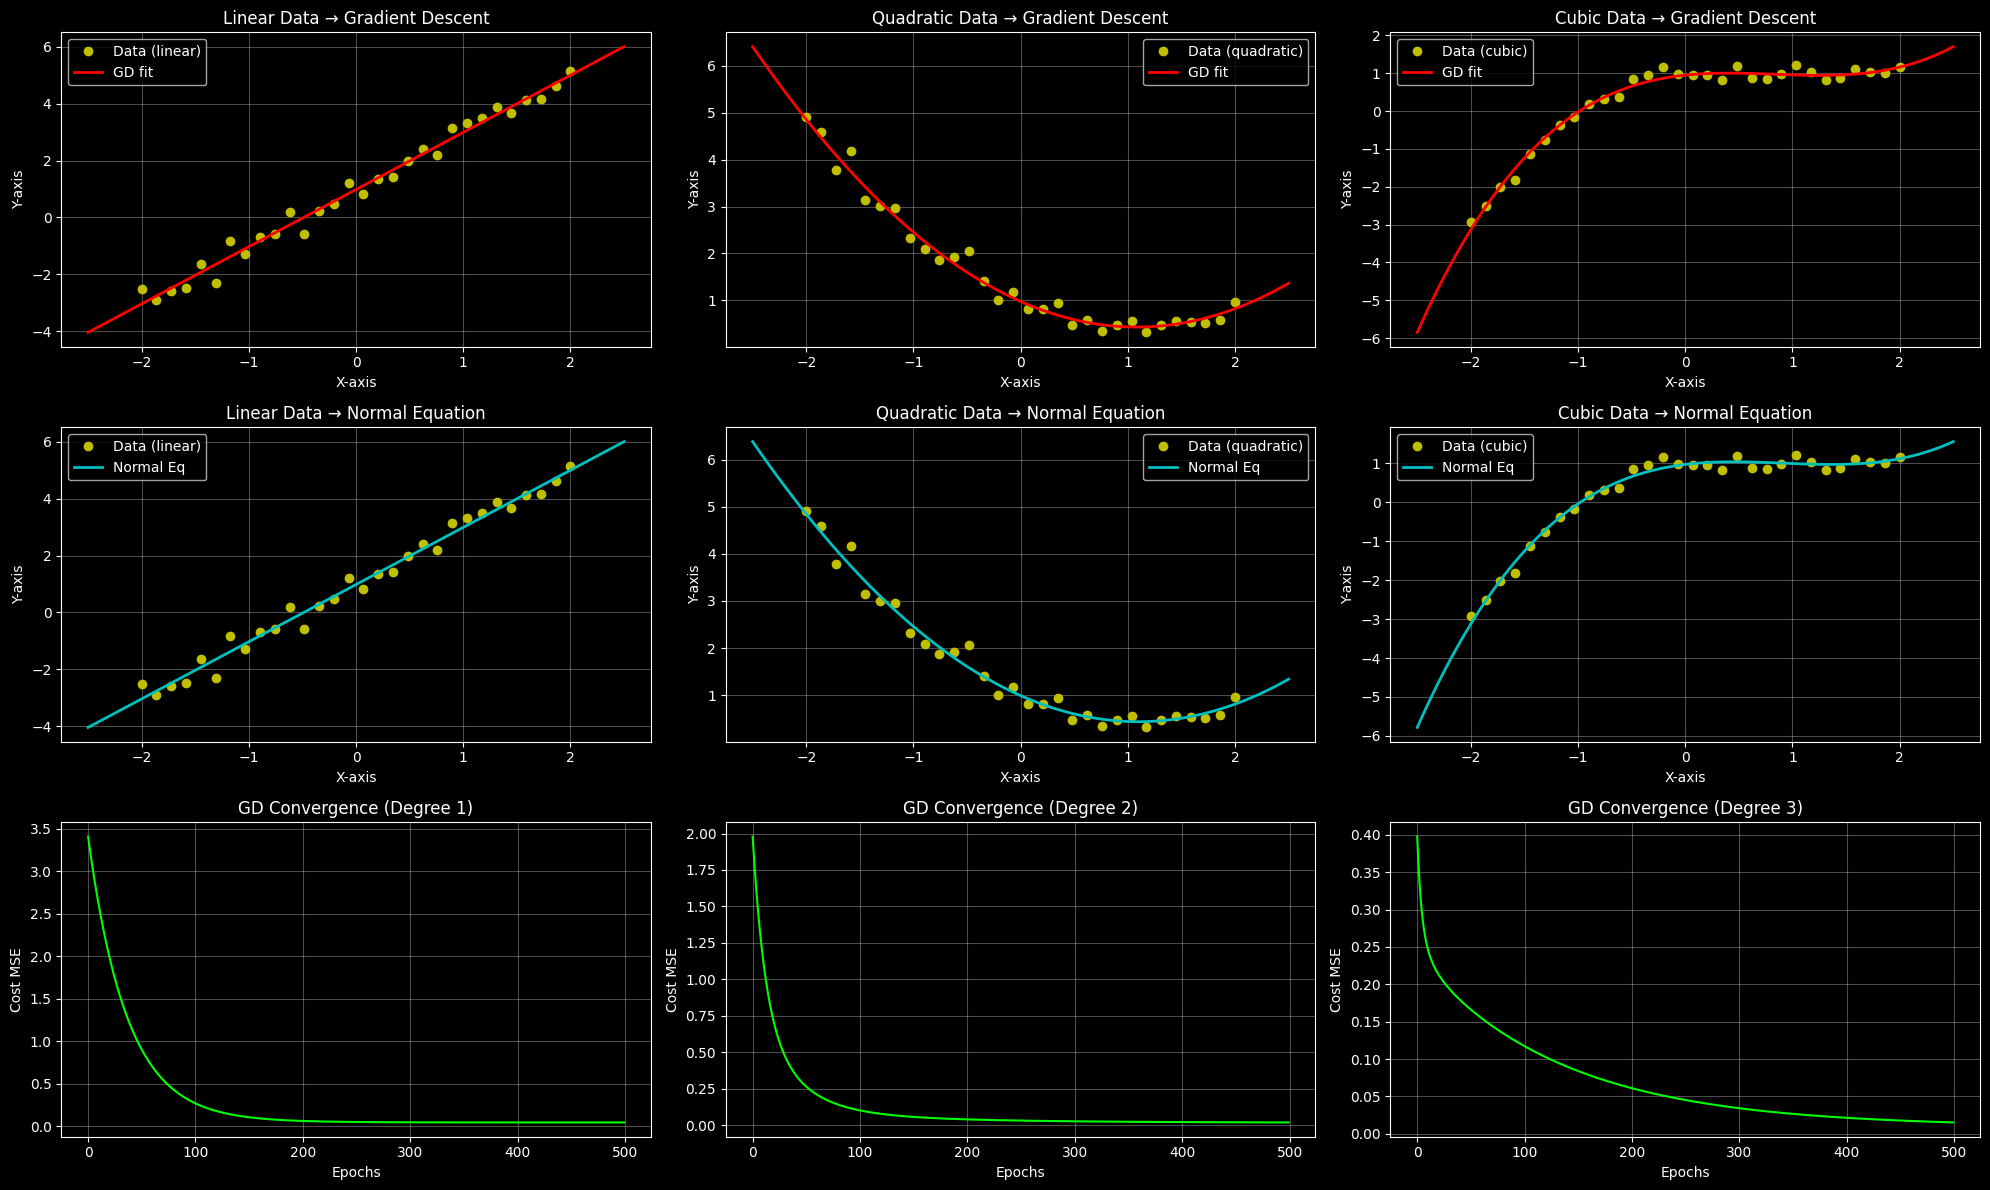

Gradient Descent vs Normal Equation Weights:

Degree 1 (Linear):
  GD:     y = 2.012x + 0.982
  Normal: y = 2.012x + 0.982
  True:   y = 2.000x + 1.000

Degree 2 (Quadratic):
  GD:     y = 0.465x² + -1.008x + 0.978
  Normal: y = 0.459x² + -1.008x + 0.992
  True:   y = 0.500x² - 1.000x + 1.000

Degree 3 (Cubic):
  GD:     y = 0.194x³ + -0.484x² + 0.296x + 0.950
  Normal: y = 0.181x³ + -0.493x² + 0.336x + 0.972
  True:   y = 0.200x³ - 0.500x² + 0.300x + 1.000

Standardization Demo (Degree 5):
Without standardization: Final cost = 0.085213 (lr=0.00001)
With standardization:    Final cost = 0.036879 (lr=0.1)
Normal Equation:         Final cost = 0.032252 (instant)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')

def create_polynomial_features(x, degree):
    """Create polynomial features"""
    return np.column_stack([x**i for i in range(degree + 1)])

def standardize_features(X):
    """Standardize features to have mean=0, std=1"""
    X_std = X.copy()
    # Don't standardize the bias term (first column of ones)
    X_std[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)
    return X_std

def polynomial_regression_gd(x, y, degree, learning_rate=0.01, epochs=1000, standardize=False):
    """Polynomial regression with gradient descent"""
    X = create_polynomial_features(x, degree)

    if standardize:
        X_original = X.copy()
        X = standardize_features(X) # don't worry about understanding this at the current stage we will discuss it later (this is Z-scoring)

    np.random.seed(42)
    weights = np.random.randn(degree + 1) * 0.1 # note that we put the bias with weights

    costs = []
    for epoch in range(epochs):
        y_pred = X @ weights
        error = y_pred - y
        gradients = (X.T @ error) / len(x)
        weights -= learning_rate * gradients

        cost = np.mean(error**2) / 2
        costs.append(cost)

        if cost < 1e-6:
            break

    return weights, costs, (X_original if standardize else X)

def polynomial_regression_normal(x, y, degree, standardize=False): # look at this after the 4th lecture
    """Polynomial regression using Normal Equation"""
    X = create_polynomial_features(x, degree)

    if standardize:
        X_original = X.copy()
        X = standardize_features(X)

    # Normal equation: weights = (X^T X)^(-1) X^T y
    weights = np.linalg.inv(X.T @ X) @ X.T @ y

    return weights, (X_original if standardize else X)

# Create figure with original examples
plt.figure(figsize=(20, 12), dpi=100)

# Example 1: Linear data (degree 1)
plt.subplot(3, 3, 1)
np.random.seed(1)
x1 = np.linspace(-2, 2, 30)
y1_true = 2*x1 + 1
y1 = y1_true + np.random.normal(0, 0.3, len(x1))

plt.plot(x1, y1, 'oy', markersize=6, label='Data (linear)')
weights1_gd, _, X1 = polynomial_regression_gd(x1, y1, degree=1)

x_plot = np.linspace(-2.5, 2.5, 100)
X_plot = create_polynomial_features(x_plot, 1)
y_plot = X_plot @ weights1_gd
plt.plot(x_plot, y_plot, 'r-', linewidth=2, label='GD fit')
plt.title('Linear Data → Gradient Descent')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True, alpha=0.3)

# Example 2: Quadratic data (degree 2)
plt.subplot(3, 3, 2)
np.random.seed(2)
x2 = np.linspace(-2, 2, 30)
y2_true = 0.5*x2**2 - x2 + 1
y2 = y2_true + np.random.normal(0, 0.2, len(x2))

plt.plot(x2, y2, 'oy', markersize=6, label='Data (quadratic)')
weights2_gd, _, X2 = polynomial_regression_gd(x2, y2, degree=2)

X_plot = create_polynomial_features(x_plot, 2)
y_plot = X_plot @ weights2_gd
plt.plot(x_plot, y_plot, 'r-', linewidth=2, label='GD fit')
plt.title('Quadratic Data → Gradient Descent')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True, alpha=0.3)

# Example 3: Cubic data (degree 3)
plt.subplot(3, 3, 3)
np.random.seed(3)
x3 = np.linspace(-2, 2, 30)
y3_true = 0.2*x3**3 - 0.5*x3**2 + 0.3*x3 + 1
y3 = y3_true + np.random.normal(0, 0.15, len(x3))

plt.plot(x3, y3, 'oy', markersize=6, label='Data (cubic)')
weights3_gd, _, X3 = polynomial_regression_gd(x3, y3, degree=3)

X_plot = create_polynomial_features(x_plot, 3)
y_plot = X_plot @ weights3_gd
plt.plot(x_plot, y_plot, 'r-', linewidth=2, label='GD fit')
plt.title('Cubic Data → Gradient Descent')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True, alpha=0.3)

# Same examples with Normal Equation
plt.subplot(3, 3, 4)
plt.plot(x1, y1, 'oy', markersize=6, label='Data (linear)')
weights1_ne, _ = polynomial_regression_normal(x1, y1, degree=1)

X_plot = create_polynomial_features(x_plot, 1)
y_plot = X_plot @ weights1_ne
plt.plot(x_plot, y_plot, 'c-', linewidth=2, label='Normal Eq')
plt.title('Linear Data → Normal Equation')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 3, 5)
plt.plot(x2, y2, 'oy', markersize=6, label='Data (quadratic)')
weights2_ne, _ = polynomial_regression_normal(x2, y2, degree=2)

X_plot = create_polynomial_features(x_plot, 2)
y_plot = X_plot @ weights2_ne
plt.plot(x_plot, y_plot, 'c-', linewidth=2, label='Normal Eq')
plt.title('Quadratic Data → Normal Equation')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 3, 6)
plt.plot(x3, y3, 'oy', markersize=6, label='Data (cubic)')
weights3_ne, _ = polynomial_regression_normal(x3, y3, degree=3)

X_plot = create_polynomial_features(x_plot, 3)
y_plot = X_plot @ weights3_ne
plt.plot(x_plot, y_plot, 'c-', linewidth=2, label='Normal Eq')
plt.title('Cubic Data → Normal Equation')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True, alpha=0.3)

# Show cost convergence for gradient descent
degrees = [1, 2, 3]
data_sets = [(x1, y1), (x2, y2), (x3, y3)]

for idx, (degree, (x, y)) in enumerate(zip(degrees, data_sets)):
    plt.subplot(3, 3, idx + 7)
    weights, costs, _ = polynomial_regression_gd(x, y, degree, epochs=500)
    plt.plot(costs, 'lime')
    plt.xlabel('Epochs')
    plt.ylabel('Cost MSE')
    plt.title(f'GD Convergence (Degree {degree})')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print comparison
print("Gradient Descent vs Normal Equation Weights:\n")

print("Degree 1 (Linear):")
print(f"  GD:     y = {weights1_gd[1]:.3f}x + {weights1_gd[0]:.3f}")
print(f"  Normal: y = {weights1_ne[1]:.3f}x + {weights1_ne[0]:.3f}")
print(f"  True:   y = 2.000x + 1.000\n")

print("Degree 2 (Quadratic):")
print(f"  GD:     y = {weights2_gd[2]:.3f}x² + {weights2_gd[1]:.3f}x + {weights2_gd[0]:.3f}")
print(f"  Normal: y = {weights2_ne[2]:.3f}x² + {weights2_ne[1]:.3f}x + {weights2_ne[0]:.3f}")
print(f"  True:   y = 0.500x² - 1.000x + 1.000\n")

print("Degree 3 (Cubic):")
print(f"  GD:     y = {weights3_gd[3]:.3f}x³ + {weights3_gd[2]:.3f}x² + {weights3_gd[1]:.3f}x + {weights3_gd[0]:.3f}")
print(f"  Normal: y = {weights3_ne[3]:.3f}x³ + {weights3_ne[2]:.3f}x² + {weights3_ne[1]:.3f}x + {weights3_ne[0]:.3f}")
print(f"  True:   y = 0.200x³ - 0.500x² + 0.300x + 1.000\n")

# Demonstrate standardization benefit for higher degree
print("="*60)
print("Standardization Demo (Degree 5):")
print("="*60)

x5 = np.linspace(-2, 2, 40)
y5_true = 0.1*x5**5 - 0.2*x5**3 + 0.5*x5
y5 = y5_true + np.random.normal(0, 0.3, len(x5))

# Without standardization
weights_no_std, costs_no_std, _ = polynomial_regression_gd(x5, y5, degree=5, learning_rate=0.00001, epochs=1000)
print(f"Without standardization: Final cost = {costs_no_std[-1]:.6f} (lr=0.00001)")

# With standardization
weights_std, costs_std, _ = polynomial_regression_gd(x5, y5, degree=5, learning_rate=0.1, epochs=1000, standardize=True)
print(f"With standardization:    Final cost = {costs_std[-1]:.6f} (lr=0.1)")

# Normal equation
weights_normal, _ = polynomial_regression_normal(x5, y5, degree=5)
y_pred_normal = create_polynomial_features(x5, 5) @ weights_normal
cost_normal = np.mean((y_pred_normal - y5)**2) / 2
print(f"Normal Equation:         Final cost = {cost_normal:.6f} (instant)")

# Bonus section

(100,)


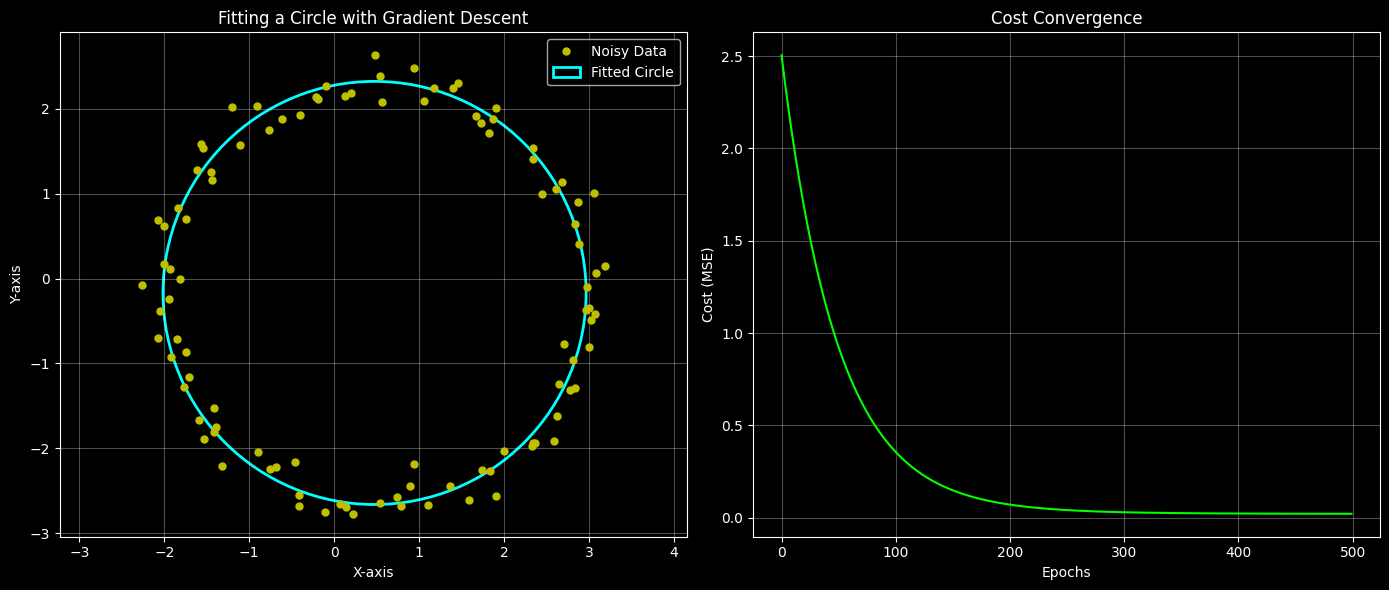

Circle Fitting Results:

Learned parameters: h=0.475, k=-0.170, r=2.490
True parameters:    h=0.500, k=-0.200, r=2.500


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

plt.style.use('dark_background')

# Generate noisy data points on a circle
np.random.seed(42)
h_true, k_true, r_true = 0.5, -0.2, 2.5
theta = np.linspace(0, 2 * np.pi, 100)
x_data = h_true + r_true * np.cos(theta) + np.random.normal(0, 0.15, 100)
y_data = k_true + r_true * np.sin(theta) + np.random.normal(0, 0.15, 100)

# Initialize parameters and hyperparameters
h, k, r = 0.0, 0.0, 1.0  # Initial guess for the circle's parameters, h,k represent the center of the circle so x and y values.
learning_rate = 0.01
epochs = 500
costs = []

print(x_data.shape)
# Gradient Descent Loop
for epoch in range(epochs):
    # Calculate distances and errors (part of the cost function)
    distances = np.sqrt((x_data - h)**2 + (y_data - k)**2) # this is the circle equation taking the sqrt should give r so x and y should satisfy that
    # if this was really a circle .. so the error is how far that value is compared to the actual r
    '''Note that here we didn't consider inference (testing) which becomes tricky for circle fitting, we discussed this after the lecture
       and points inside the circle will have two projections (y-values) those outside will not be defined .. unless we try to do a special
       fitting on the nearest point on the circle and here we are not doing this. '''
    errors = distances - r

    # Calculate gradients for each parameter
    grad_h = np.mean(errors * (h - x_data) / distances)
    grad_k = np.mean(errors * (k - y_data) / distances)
    grad_r = -np.mean(errors)

    # Update parameters
    h -= learning_rate * grad_h
    k -= learning_rate * grad_k
    r -= learning_rate * grad_r

    # Track cost
    cost = np.mean(errors**2)
    costs.append(cost)

# Plot the results
plt.figure(figsize=(14, 6))

# Plot the circle fit
plt.subplot(1, 2, 1)
plt.plot(x_data, y_data, 'oy', markersize=5, label='Noisy Data')
fit_circle = Circle((h, k), r, color='cyan', fill=False, linewidth=2, label='Fitted Circle')
plt.gca().add_patch(fit_circle)
plt.title('Fitting a Circle with Gradient Descent')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal') # Important for circles to look like circles!

# Plot convergence
plt.subplot(1, 2, 2)
plt.plot(costs, 'lime')
plt.title('Cost Convergence')
plt.xlabel('Epochs')
plt.ylabel('Cost (MSE)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print the final learned vs true parameters
print("Circle Fitting Results:\n")
print(f"Learned parameters: h={h:.3f}, k={k:.3f}, r={r:.3f}")
print(f"True parameters:    h={h_true:.3f}, k={k_true:.3f}, r={r_true:.3f}")

Overfitting Example

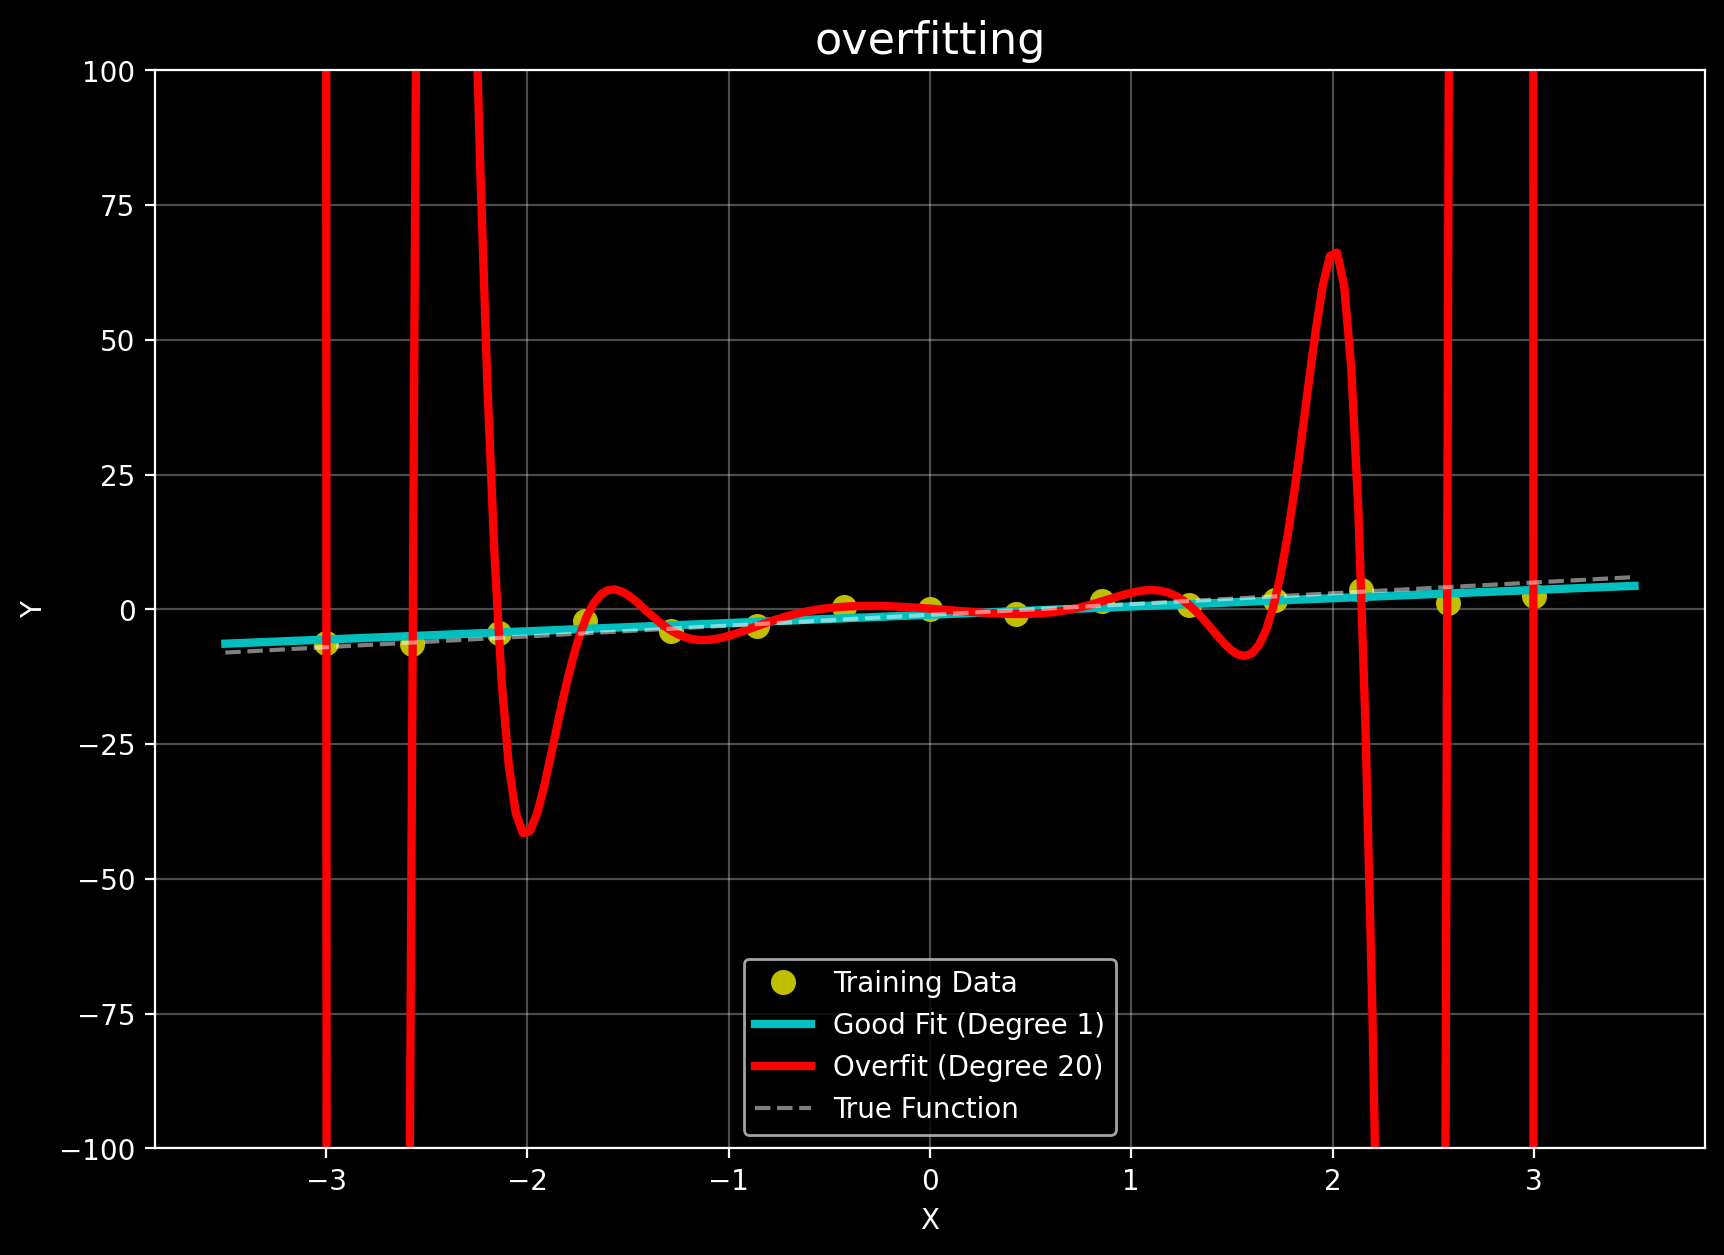

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')

# Helper function to create features
def create_polynomial_features(x, degree):
    """Creates a matrix of [1, x, x^2, ...]"""
    return np.column_stack([x**i for i in range(degree + 1)])

# Generate the same linear data with noise
np.random.seed(42)
x_train = np.linspace(-3, 3, 15)
y_true = 2 * x_train - 1
y_train = y_true + np.random.normal(0, 1.5, x_train.shape[0])

# Fit an appropriate model (degree 1) using a stable solver
X_linear = create_polynomial_features(x_train, 1)
weights_linear, _, _, _ = np.linalg.lstsq(X_linear, y_train, rcond=None)

# Fit an overly complex model (degree 20) using a stable solver -> notice the overfitting .. note here we are using a solver to handle this
degree_overfit = 20
X_overfit = create_polynomial_features(x_train, degree_overfit)
weights_overfit, _, _, _ = np.linalg.lstsq(X_overfit, y_train, rcond=None)

# Plot the results
x_plot = np.linspace(-3.5, 3.5, 200)
y_plot_linear = create_polynomial_features(x_plot, 1) @ weights_linear
y_plot_overfit = create_polynomial_features(x_plot, degree_overfit) @ weights_overfit

plt.figure(figsize=(10, 7), dpi=200)
plt.plot(x_train, y_train, 'oy', markersize=8, label='Training Data')
plt.plot(x_plot, y_plot_linear, 'c-', linewidth=3, label='Good Fit (Degree 1)')
plt.plot(x_plot, y_plot_overfit, 'r-', linewidth=3, label=f'Overfit (Degree {degree_overfit})')
plt.plot(x_plot, 2 * x_plot - 1, 'w--', alpha=0.5, label='True Function')

plt.title('overfitting', fontsize=16)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-100, 100) # Zoom in to see the oscillations, also, try zooming out to see how huge the oscillations are!
plt.show()